<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Epid_T6_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
!pip install EoN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 6.6 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120820 sha256=e0657153a6c2b89e95a9eed840d577d238a073356f15d5f957b6d435a0e3ebda
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [3]:
import EoN

import networkx as nx
from matplotlib import rc
import matplotlib.pylab as plt

#import scipy
#import random
import numpy as np

import scipy.stats as stats

# Ejercicio 3.

0.9932620530009145

In [96]:
N=1000          #Numero de individuos
tau = 0.5       # tasa de transmisión
gamma = 0.1     # tasa de recuperación
#ts = scipy.arange(0,40,0.05)
n_sim = 100      # number of simulations to run for each
def sir_sim(k_poiss, n_sim,nodo_fijo):
    report_times = np.arange(0,30,0.1) #scipy.linspace(0,30,3000)
    sums = 0*report_times
    I_s=[]
    K_s=[]
    for iter in range(n_sim):
        if(type(nodo_fijo)==type(0)):
            nodo_fijo_i=nodo_fijo
        else:
            nodo_fijo_i=nodo_fijo[iter]
        G = nx.configuration_model(k_poiss)
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=nodo_fijo_i)#initial_infecteds es el nodo infectado.
        K_s.append(G.degree[nodo_fijo_i])#Regresa el grado del nodo inicial.
        I_s.append(R[-1])#Los que se recuperaron. i.e, el total de individuos infectados al final de la epidemia
    return(K_s,I_s)

In [55]:
ksum=1
while(ksum%2!=0):#Que defina una grafica.
        k_dist=np.random.poisson(3.5,1000)
        ksum=sum(k_dist)
_,finals=sir_sim(k_dist,100,nodo_fijo=0)
_,finals2=sir_sim(k_dist,100,nodo_fijo=np.random.choice(range(1000),size=100,replace=True))

906.67


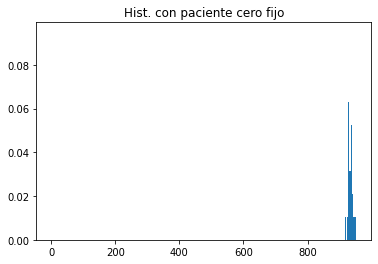

784.66


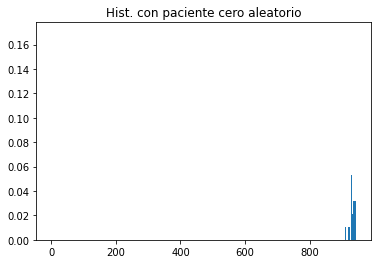

In [56]:
print(np.mean(finals))
plt.hist(finals,bins=1000,density=True)
plt.title('Hist. con paciente cero fijo')
plt.show()
print(np.mean(finals2))
plt.hist(finals2,bins=1000,density=True)
plt.title('Hist. con paciente cero aleatorio')
plt.show()

In [59]:
K_s=[]
I_s=[]
Coef_assortativity_degree=[]
Coef_agrupamiento=[]
for k in range(100):
    np.random.seed(k)
    nodo=np.random.randint(0,1000)
    ksum=1
    while(ksum%2!=0):
        k_poiss=np.random.poisson(3.5,1000)
        ksum=sum(k_poiss)
    G = nx.configuration_model(k_poiss)
    K_s.append(G.degree[nodo])
    Coef_assortativity_degree.append(nx.assortativity.degree_assortativity_coefficient(G))#Diferente para cada grafica.
    G2 = nx.DiGraph(G)#Para calcular el clustering
    Coef_agrupamiento.append(nx.clustering(G2,nodo))#Diferente para cada grafica
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=nodo)#initial_infecteds es el nodo infectado.
    I_s.append(R[-1])#Los que se recuperaron


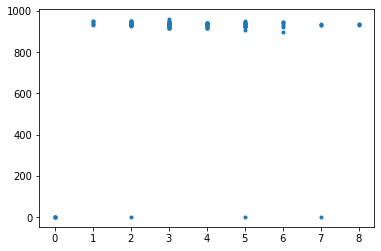

In [60]:
plt.plot(K_s,I_s,'.')

In [61]:
x=np.array(np.array(K_s).reshape((-1, 1)))
x2=np.array(np.array(Coef_assortativity_degree).reshape((-1, 1)))
x3=np.array(np.array(Coef_agrupamiento).reshape((-1, 1)))
y=np.array(I_s)

In [89]:
import pandas as pd
data = {'grado': K_s,
        'assortivity': Coef_assortativity_degree,
        'clustering': Coef_agrupamiento,  
        'y': y     
        }
df = pd.DataFrame(data)
import statsmodels.api as sm
x = sm.add_constant(df['grado']) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print(model.ess)
print_model = model.summary()
print(print_model)

324899.5232051285
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5.959
Date:                Sun, 27 Nov 2022   Prob (F-statistic):             0.0164
Time:                        04:54:58   Log-Likelihood:                -686.20
No. Observations:                 100   AIC:                             1376.
Df Residuals:                      98   BIC:                             1382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        751.8085     53.009  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


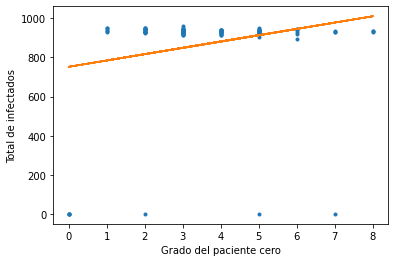

In [90]:
plt.plot(K_s,I_s,'.')
plt.plot(K_s,model.params[0]+np.array(K_s)*model.params[1])
plt.xlabel('Grado del paciente cero')
plt.ylabel('Total de infectados')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


572.7188405921279
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.266
Date:                Sun, 27 Nov 2022   Prob (F-statistic):             0.0240
Time:                        04:56:58   Log-Likelihood:                -348.99
No. Observations:                  93   AIC:                             702.0
Df Residuals:                      91   BIC:                             707.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        938.9514      2.715  

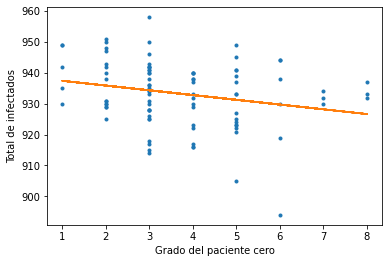

In [92]:
data_2=pd.DataFrame(data).loc[data['y']>100]
import statsmodels.api as sm
x = sm.add_constant(data_2['grado']) # adding a constant
 
model = sm.OLS(data_2['y'], x).fit()
predictions = model.predict(x) 
print(model.ess)
print_model = model.summary()
print(print_model)
plt.plot(data_2['grado'],data_2['y'],'.')
plt.plot(data_2['grado'],model.params[0]+np.array(data_2['grado'])*model.params[1])
plt.xlabel('Grado del paciente cero')
plt.ylabel('Total de infectados')
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
data = {'grado': K_s,
        'assortivity': Coef_assortativity_degree,
        'clustering': Coef_agrupamiento,       
        }
import pandas as pd
df = pd.DataFrame(data)
import statsmodels.api as sm
x = sm.add_constant(df) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print(model.ess)
print_model = model.summary()
print(print_model)

535802.3249095147
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.341
Date:                Sun, 27 Nov 2022   Prob (F-statistic):             0.0225
Time:                        04:42:04   Log-Likelihood:                -684.19
No. Observations:                 100   AIC:                             1376.
Df Residuals:                      96   BIC:                             1387.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         758.8777     52.86

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Ejercicio 4

In [108]:
ksum=1
while(ksum%2!=0):
    k_poiss=np.random.poisson(3,1000)
    ksum=sum(k_poiss)
G = nx.configuration_model(k_poiss)
R=[0]
while(R[-1]<10):#Para no tener un caso aburrido
    t, S, I, R = EoN.fast_SIR(G, 0.1, 1, initial_infecteds=0)#initial_infecteds es el nodo infectado.

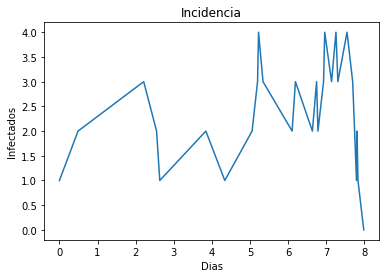

In [109]:
plt.plot(t,I)
plt.title('Incidencia')
plt.xlabel('Dias')
plt.ylabel('Infectados')
plt.show()

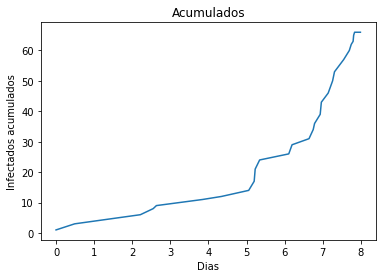

In [111]:
plt.plot(t,np.cumsum(I))
plt.title('Acumulados')
plt.xlabel('Dias')
plt.ylabel('Infectados acumulados')
plt.show()